<a href="https://colab.research.google.com/github/abdbashar/Modifing_CSV_/blob/main/Malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The following process show how to import malaria dataset from kaggle

In [ ]:
#Download JSON file by creating new token API from your kaggle account
#Upload your JSON file inside file section of your colab jupyter notebook 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullahbashar","key":"c342402d9c9b4fde35658a90ed92931e"}'}

In [ ]:
#before​ importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#copy API command of malaria dataset from kaggle
!kaggle datasets download -d miracle9to9/files1

 95% 500M/525M [00:05<00:00, 96.6MB/s]
100% 525M/525M [00:06<00:00, 90.4MB/s]


In [ ]:
#extract folders of malaria dataset inside file section of jupyter notebook
from zipfile import ZipFile
file_name = "files1.zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
print("File unzipped successfully")

File unzipped successfully


#Import the required librarers for CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout,Activation
 

print(tf.__version__)

2.4.1


#Preprocessing and shaping of malaria dataset images

In [ ]:
#Specify the image shape
image_shape=(130,130,3)
image_shape[:2]

(130, 130)

In [ ]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
## Each image in the dataset has pixel intensity ranging from 0 to 255
##so we normalized images by dividing every pixel value by 255, and now the new scale ranging from 0 to 1 
#in this section data augmentation applied as a part of preprocessing malaraia dataset images
datagen = ImageDataGenerator(rescale=1/255.0, 
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             validation_split=0.2)

#Split malalria dataset into train_set and test_set

In [ ]:
train_data_generator = datagen.flow_from_directory(directory='Malaria Cells/training_set',
                                                   target_size = (image_shape[:2]),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

validation_data_generator = datagen.flow_from_directory(directory='Malaria Cells/testing_set',
                                                   target_size = (image_shape[:2]),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 22048 images belonging to 2 classes.
Found 3166 images belonging to 2 classes.


#labeling train_set data into 0's and 1's

In [ ]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

#Build convolutional neural network model (CNN model)

In [ ]:
del tf
import tensorflow as tf
tf.random.set_seed(42)

 # Initialising the CNN
classifier = Sequential()

#1 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#2 - Pooling
# Hidden Layer 1
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolution layer
# relu turns negative values in images to 0
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3 - Flattening
# converts the matrix in a singe array
classifier.add(Flatten())


classifier.add(Dense(128))
classifier.add(Activation('relu'))


# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
classifier.add(Dropout(0.5))

#4 - Full Connection
# 128 is the final layer of outputs & from that 1 will be considered.
# Last layer, remember its binary so we use sigmoid
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

#Model feedback

In [ ]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)            

#Compiling and Fitting model

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
#Early stopping is a method that allows you to specify an arbitrarily large number of training epochs
#and stop training once the model performance stops improving on the validation dataset

In [ ]:
tf.random.set_seed(42)
history = classifier.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator),
                              callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1378/1378 [==============================] - 108s 78ms/step - loss: 0.4807 - accuracy: 0.7658 - val_loss: 0.1949 - val_accuracy: 0.9239
Epoch 2/5
1378/1378 [==============================] - 107s 78ms/step - loss: 0.1724 - accuracy: 0.9502 - val_loss: 0.1965 - val_accuracy: 0.9327
Epoch 3/5
1378/1378 [==============================] - 107s 77ms/step - loss: 0.1518 - accuracy: 0.9550 - val_loss: 0.1939 - val_accuracy: 0.9299
Epoch 4/5
1378/1378 [==============================] - 107s 78ms/step - loss: 0.1486 - accuracy: 0.9537 - val_loss: 0.1965 - val_accuracy: 0.9308
Epoch 5/5
1378/1378 [==============================] - 107s 77ms/step - loss: 0.1399 - accuracy: 0.9577 - val_loss: 0.1850 - val_accuracy: 0.9315


#Plot data to check if there is overfitting in CCN model

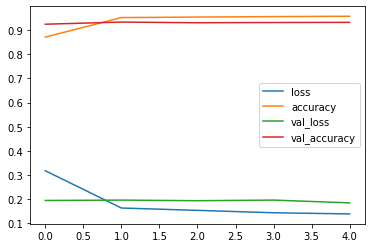

In [ ]:
import pandas as pd
df = pd.DataFrame(classifier.history.history)
df.plot.line()

#Save the model

In [ ]:
from tensorflow.keras.models import load_model
classifier.save('malaria_detector.h5')

#Load an image from single_prediction folder to predect if cell is parasitized or not

In [ ]:
import numpy as np
from keras.preprocessing import image

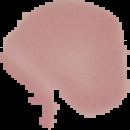

In [ ]:
#load uninfected image from single_prediction folder 
test_image = image.load_img('Malaria Cells/single_prediction/Uninfected.png', target_size = (130, 130))
test_image

In [ ]:
# Verifing ouor Model by giving samples of cell to detect malaria
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(train_data_generator.class_indices)
if result[0][0] == 1:
    prediction = 'Uninfected'
else:
    prediction = 'Parasitised'
print("The prediction result is :",prediction)

{'Parasitized': 0, 'Uninfected': 1}
The prediction result is : Uninfected


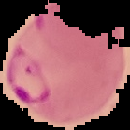

In [ ]:
#load parasitised image from single_prediction folder 
test_image = image.load_img('Malaria Cells/single_prediction/Parasitised.png', target_size = (130, 130))
test_image

In [ ]:
# Verifing ouor Model by giving samples of cell to detect malaria
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(train_data_generator.class_indices)
if result[0][0] == 1:
    prediction = 'Uninfected'
else:
    prediction = 'Parasitised'
print("The prediction result is :",prediction)

{'Parasitized': 0, 'Uninfected': 1}
The prediction result is : Parasitised
